<a href="https://colab.research.google.com/github/Chinmaya-3141/Machine-Learning-Emission-Data/blob/edit1/25_01_2023_MSE_Presentation_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gas Turbine Emission Data**

### Fetch Data

In [1]:
from datetime import datetime
import pytz
print('Code execution last started at  ',datetime.now(pytz.timezone('Asia/Kolkata')))

Code execution last started at   2023-02-13 12:59:13.190858+05:30


In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip

--2023-02-13 07:29:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1090294 (1.0M) [application/x-httpd-php]
Saving to: ‘pp_gas_emission.zip’

pp_gas_emission.zip 100%[===================>]   1.04M  3.64MB/s    in 0.3s    

2023-02-13 07:29:13 (3.64 MB/s) - ‘pp_gas_emission.zip’ saved [1090294/1090294]



In [3]:
# !gdown 1otUkltGJRfbVDTvCmElLTnmnV-4FEtrF

In [4]:
!unzip pp_gas_emission.zip

Archive:  pp_gas_emission.zip
  inflating: gt_2011.csv             
  inflating: gt_2012.csv             
  inflating: gt_2013.csv             
  inflating: gt_2014.csv             
  inflating: gt_2015.csv             


## Preprocessing

### Import Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_2015=pd.concat([pd.read_csv("gt_2011.csv"),\
                     pd.read_csv("gt_2012.csv"),\
                     pd.read_csv("gt_2013.csv"),\
                     pd.read_csv("gt_2014.csv"),\
                     pd.read_csv("gt_2015.csv")],\
                    axis=0)

In [7]:
data_2015.shape

(36733, 11)

In [8]:
data_2015.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


### EDA

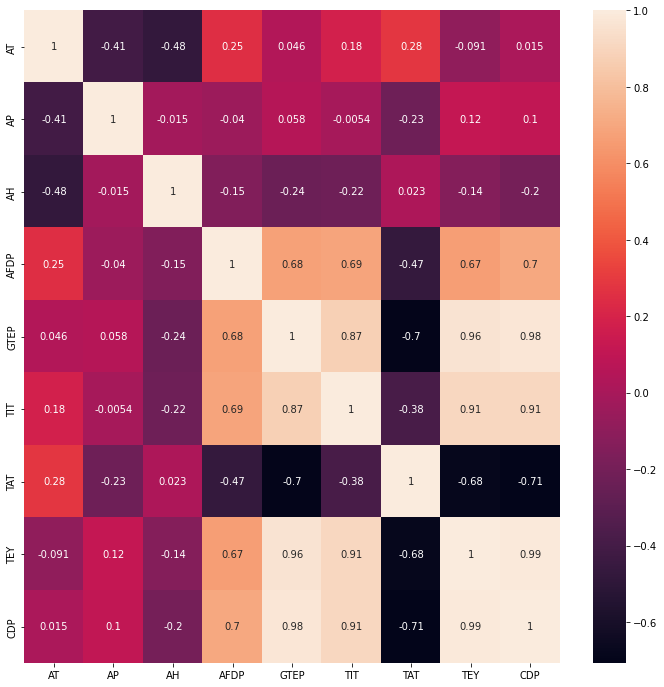

In [9]:
# Showing correlation of all variables among each other and not selecting target variables

plt.figure(figsize=(12,12))
sns.heatmap(data_2015.loc[:,'AT':'CDP'].corr(),annot=True)
# plt.savefig("corr.png")

In [10]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=(16,7)
# f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(1,9)
# sns.boxplot(data=data_2015['AT'], ax=ax1, palette = 'coolwarm')
# sns.boxplot(data=data_2015['AP'], ax=ax2)
# sns.boxplot(data=data_2015['AH'], ax=ax3, palette = 'coolwarm')
# sns.boxplot(data=data_2015['AFDP'], ax=ax4)
# sns.boxplot(data=data_2015['GTEP'], ax=ax5, palette='coolwarm')
# sns.boxplot(data=data_2015['TIT'], ax=ax6)
# sns.boxplot(data=data_2015['TAT'], ax=ax7, palette='coolwarm')
# sns.boxplot(data=data_2015['TEY'], ax=ax8)
# sns.boxplot(data=data_2015['CDP'], ax=ax9, palette = 'coolwarm')
# f.tight_layout()
# plt.savefig("boxplot.png")

In [11]:
# data_2015.to_csv()

### Outlier Treatment

In [12]:
#LOF is a robust outlier detection method in ML

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [13]:
# Scaling all variables except for target variables

data_2015_scaled= StandardScaler().fit_transform(data_2015.loc[:,'AT':'CDP'])

In [14]:
data_2015.shape

(36733, 11)

In [15]:
# Using Local Outlier Factor to identify potential outliers

lof=LocalOutlierFactor(n_neighbors=5)
pred = lof.fit_predict(data_2015_scaled)

In [16]:
pd.Series(pred).value_counts()

 1    35425
-1     1308
dtype: int64

In [17]:
# initialising an empty array, passing no of rows/entries using shape[0]
# storing predictions for 5,7,9 neighbours in all_preds by looping n_neigh over range(5,10,2)

all_preds = np.zeros(shape=(data_2015_scaled.shape[0],3))
i=0
for n_neigh in range(5,10,2):
  lof=LocalOutlierFactor(n_neighbors=n_neigh)
  pred=lof.fit_predict(data_2015_scaled)
  all_preds[:,i]=pred
  i+=1

In [18]:
all_preds

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1.],
       [-1., -1.,  1.],
       [ 1.,  1.,  1.]])

In [19]:
# Sum along rows, that is sum prediction whether outlier or not according to 5,7 and 9 neighbour prediction

outlier_preds = all_preds.sum(axis=1)

In [20]:
# outlier_preds

In [21]:
# Summed values

# np.unique(outlier_preds)

In [22]:
# Pick points which are considered outliers by at least two out of three n_neighbours lof
# This will happen when sum of row is 1 or 3
# final_outlier assigns 1 to outliers
# This is done by checking if rowsum is >= 1, that is 1 or 3
# If two lof numbers say not outlier, we keep it
# Like a voting method.

final_outlier=np.where(outlier_preds>=1,1,-1)

In [23]:
final_outlier

array([ 1,  1,  1, ...,  1, -1,  1])

In [24]:
# Checking percentage of Outliers to non-outliers from our prediction

pd.Series(final_outlier).value_counts(normalize=True)

 1    0.973784
-1    0.026216
dtype: float64

Consensus outliers:

(963/36733)*100 \
= 2.6216208858519587%

In [25]:
data_2015_no_outlier = data_2015[final_outlier==1]

## Multiple Linear Regression

### Import Modules

In [26]:
import statsmodels.formula.api as sm

In [27]:
columns=data_2015.columns

In [28]:
columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [29]:
# data_2015_NOx=data_2015_no_outlier.drop('CO',axis=1)
# data_2015_CO=data_2015_no_outlier.drop('NOX',axis=1)

### Linear Regression

In [30]:
# Join column numbers 1 to 9 to pass string with formula for CO

f1='CO~'+'+'.join(columns[:9])
f1

'CO~AT+AP+AH+AFDP+GTEP+TIT+TAT+TEY+CDP'

In [31]:
r_co=sm.ols(formula=f1, data=data_2015_no_outlier)

In [32]:
result_co=r_co.fit()

In [33]:
result_co.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5536.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:29:32   Log-Likelihood:                -62953.
No. Observations:               35770   AIC:                         1.259e+05
Df Residuals:                   35760   BIC:                         1.260e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    121.8235      2.119     57.502      0.000     117.671     125.976
AT            -0.0501      0.003    -17.351      0.000      -0.056      -0.044
AP            -0.0020      0.001     -1.389      0.165      -0.005       0.001
AH            -0.0076      0.001    -11.773      0.000      -0.009      -0.006
AFDP          -0.1614      0.015    -10.550      0.000      -0.191      -0.131
GTEP           0.1016      0.010     10.427      0.000       0.082       0.121
TIT           -0.0690      0.003    -26.221      0.000      -0.074      -0.064
TAT           -0.0754      0.003    -21.650      0.000      -0.082      -0.069
TEY           -0.1916      0.008    -25.040      0.000      -0.207      -0.177
CDP            1.9421      0.108     17.977      0.000       1.730       2.154
==============================================================================
Omnibus:                    45324.595   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21766576.561
Skew:                           6.593   Prob(JB):                         0.00
Kurtosis:                     123.127   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Join column numbers 1 to 9 to pass string with formula for NOx

f2='NOX~'+'+'.join(columns[:9])
f2

'NOX~AT+AP+AH+AFDP+GTEP+TIT+TAT+TEY+CDP'

In [35]:
# OLS Regression

r_nox=sm.ols(formula=f2, data=data_2015_no_outlier)

In [36]:
result_nox=r_nox.fit()

In [37]:
result_nox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     4268.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:29:33   Log-Likelihood:            -1.2546e+05
No. Observations:               35770   AIC:                         2.509e+05
Df Residuals:                   35760   BIC:                         2.510e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.5671     12.162     -5.062      0.000     -85.406     -37.728
AT            -1.7649      0.017   -106.504      0.000      -1.797      -1.732
AP            -0.2360      0.008    -28.839      0.000      -0.252      -0.220
AH            -0.2224      0.004    -60.016      0.000      -0.230      -0.215
AFDP           0.7286      0.088      8.295      0.000       0.556       0.901
GTEP          -0.1015      0.056     -1.815      0.070      -0.211       0.008
TIT            1.4144      0.015     93.655      0.000       1.385       1.444
TAT           -1.5245      0.020    -76.244      0.000      -1.564      -1.485
TEY           -1.9461      0.044    -44.304      0.000      -2.032      -1.860
CDP           -1.9019      0.620     -3.067      0.002      -3.117      -0.686
==============================================================================
Omnibus:                     7249.078   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26041.843
Skew:                           0.996   Prob(JB):                         0.00
Kurtosis:                       6.675   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variable selection using Variance Inflation Factor (VIF)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
variance_inflation_factor(data_2015_no_outlier.loc[:,'AT':'CDP'].values,0)

46.86457466862405

In [40]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
X_1 = data_2015_no_outlier.loc[:,'AT':'CDP'].copy()

In [42]:
vif_scores = {k: v for k, v in zip(X_1.columns,
                                   [variance_inflation_factor(X_1.values, i) \
                                    for i in range(len(X_1.columns))])}

In [43]:
vif_scores_sorted = {k:v for k, v in sorted(vif_scores.items(),key=lambda item:item[1], reverse = True)}

In [44]:
vif_scores_sorted

{'TIT': 121734.40451561549,
 'TAT': 63794.72222418256,
 'AP': 28307.64508797133,
 'CDP': 27875.950114991723,
 'TEY': 13827.838631867879,
 'GTEP': 1057.1442758291464,
 'AFDP': 67.3993997468524,
 'AT': 46.86457466862405,
 'AH': 46.00271067397057}

In [45]:
# X_1.columns.drop('TIT')

#### Defining functions to select variables with lowest VIF

In [46]:
def var_selection_vif(data_exog: pd.DataFrame, th: int=5):
  vif_scores = {k: v for k, v in zip(data_exog.columns,
                                     [variance_inflation_factor(data_exog.values,i)\
                                      for i in range(len(data_exog.columns))])}
  vif_scores_sorted = {k:v for k, v in sorted(vif_scores.items(),
                                            key=lambda item:item[1],
                                            reverse = True)}
  if vif_scores_sorted[list(vif_scores_sorted.keys())[0]]>th:
    vars = data_exog.columns.drop(list(vif_scores_sorted.keys())[0])
    return (data_exog[vars], vif_scores_sorted)
  else:
    return(data_exog, vif_scores_sorted)

In [47]:
n_old = len(X_1.columns)
n_new = 0
while n_old != n_new:
  X_1, vif = var_selection_vif(X_1)
  print(vif)
  n = len(X_1.columns)
  n_old = n_new
  n_new= n

{'TIT': 121734.40451561549, 'TAT': 63794.72222418256, 'AP': 28307.64508797133, 'CDP': 27875.950114991723, 'TEY': 13827.838631867879, 'GTEP': 1057.1442758291464, 'AFDP': 67.3993997468524, 'AT': 46.86457466862405, 'AH': 46.00271067397057}
{'CDP': 26213.793293308318, 'AP': 25132.999808507677, 'TAT': 16654.669880172027, 'TEY': 12389.760061720457, 'GTEP': 998.8772137798093, 'AFDP': 64.11990672897241, 'AH': 45.076480065618966, 'AT': 42.38049924200662}
{'AP': 10427.885813072946, 'TAT': 10285.376502461655, 'TEY': 1652.4813561896851, 'GTEP': 881.4367428504926, 'AFDP': 63.55045455859313, 'AH': 44.157242132533455, 'AT': 18.663482430935414}
{'TEY': 1633.9781998684982, 'GTEP': 820.2615455119885, 'TAT': 273.0289962365141, 'AFDP': 61.77791042516804, 'AH': 43.633800292642555, 'AT': 14.028633028570969}
{'TAT': 117.53107832474556, 'GTEP': 75.85442546047754, 'AFDP': 57.56605380964737, 'AH': 43.38510835859359, 'AT': 10.44256264426581}
{'AFDP': 56.88593015304628, 'GTEP': 54.566599149677266, 'AH': 14.490126

### Regression with variables having appropriate VIF

In [48]:
r_final_co = sm.ols(formula='CO~AT+AH', 
                 data = data_2015_no_outlier[list(X_1.columns)+['CO']])
result_final_co = r_final_co.fit()
print(result_final_co.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     614.8
Date:                Mon, 13 Feb 2023   Prob (F-statistic):          3.03e-263
Time:                        07:29:37   Log-Likelihood:                -77956.
No. Observations:               35770   AIC:                         1.559e+05
Df Residuals:                   35767   BIC:                         1.559e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7753      0.089     31.036      0.0

In [49]:
r_final_nox = sm.ols(formula='NOX~AT+AH', 
                 data = data_2015_no_outlier[list(X_1.columns)+['NOX']])
result_final_nox = r_final_nox.fit()
print(result_final_nox.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     8574.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:29:37   Log-Likelihood:            -1.3151e+05
No. Observations:               35770   AIC:                         2.630e+05
Df Residuals:                   35767   BIC:                         2.630e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.5104      0.400    226.492      0.0

### Variable selection using Lasso regression coefficients

In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso_reg1 = Lasso(alpha=2)
lasso_reg1.fit(X=data_2015_no_outlier.loc[:,'AT':'CDP'],\
              y=data_2015_no_outlier['CO'])

Lasso(alpha=2)

In [52]:
CO_vars = {k:v for k,v in zip(data_2015_no_outlier.loc[:,'AT':'CDP'].columns, lasso_reg1.coef_)}

In [53]:
lasso_reg1.score(X=data_2015_no_outlier.loc[:,'AT':'CDP'],\
              y=data_2015_no_outlier['CO'])

0.5374513201552922

In [54]:
lasso_reg2 = Lasso(alpha=2)
lasso_reg2.fit(X=data_2015_no_outlier.loc[:,'AT':'CDP'],\
               y=data_2015_no_outlier['NOX'])

Lasso(alpha=2)

In [55]:
NOx_vars = {k:v for k,v in zip(data_2015_no_outlier.loc[:,'AT':'CDP'].columns, lasso_reg2.coef_)}

In [56]:
lasso_reg2.score(X=data_2015_no_outlier.loc[:,'AT':'CDP'],\
                 y=data_2015_no_outlier['NOX'])

0.46343430445271516

### Analysis of errors

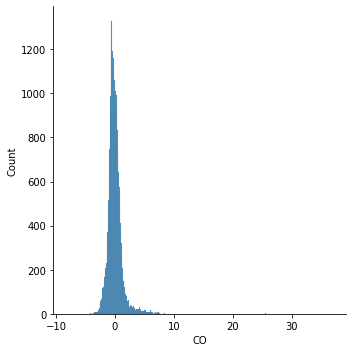

In [57]:
errors1 = data_2015_no_outlier['CO'] - lasso_reg1.predict(data_2015_no_outlier.loc[:,'AT':'CDP'])
d1=sns.displot(errors1)
plt.savefig('error-plot-CO.png')

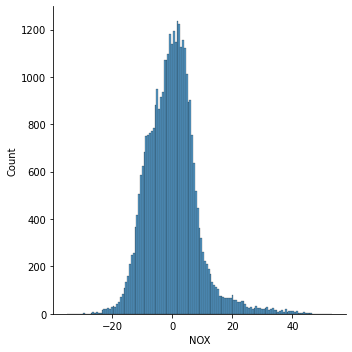

In [58]:
errors2 = data_2015_no_outlier['NOX'] - lasso_reg2.predict(data_2015_no_outlier.loc[:,'AT':'CDP'])
d2=sns.displot(errors2)
plt.savefig('error-plot-NOx.png')

In [59]:
import statsmodels.api as smf

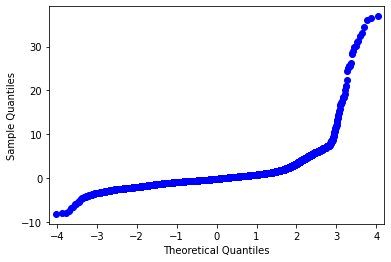

<Figure size 432x288 with 0 Axes>

In [60]:
smf.qqplot(errors1)
plt.show()
plt.savefig('error-dist-CO.png')

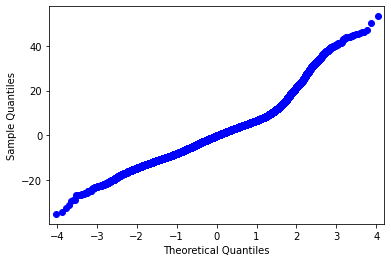

<Figure size 432x288 with 0 Axes>

In [61]:
smf.qqplot(errors2)
plt.show()
plt.savefig('error-dist-NOx.png')

### Multiple Linear Regression with relevant variables

In [63]:
r_co_final_combined = sm.ols(formula='CO~AT+AH+TIT+TAT',\
                             data = data_2015[['AT','AP','AH','TIT','TAT']+['CO']])
result_co = r_co_final_combined.fit()
print(result_co.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:30:24   Log-Likelihood:                -67223.
No. Observations:               36733   AIC:                         1.345e+05
Df Residuals:                   36728   BIC:                         1.345e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.5889      1.100    149.691      0.0

In [65]:
r_nox_final_combined = sm.ols(formula='NOX~AT+AP+AH+TIT+TAT+TEY',\
                              data = data_2015[['AT','AP','AH','TIT','TAT','TEY']+['NOX']])
result_nox = r_nox_final_combined.fit()
print(result_nox.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     6546.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        07:30:45   Log-Likelihood:            -1.2904e+05
No. Observations:               36733   AIC:                         2.581e+05
Df Residuals:                   36726   BIC:                         2.582e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -83.1243     10.420     -7.978      0.0

### Cook's Distance

In [66]:
#cook's distnace tells the change in model when a single datapoint is dropped

In [67]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [69]:
inf1 = influence(result_co)

In [70]:
inf2 = influence(result_nox)

In [71]:
inf1.cooks_distance

(0       0.000020
 1       0.000016
 2       0.000015
 3       0.000023
 4       0.000024
           ...   
 7379    0.000378
 7380    0.000412
 7381    0.000463
 7382    0.000013
 7383    0.000737
 Length: 36733, dtype: float64,
 array([1.        , 1.        , 1.        , ..., 0.99999999, 1.        ,
        0.99999996]))

In [72]:
inf2.cooks_distance

(0       5.465794e-06
 1       4.153554e-06
 2       9.388358e-07
 3       5.122620e-06
 4       8.282686e-06
             ...     
 7379    1.089896e-04
 7380    1.152904e-04
 7381    3.589406e-04
 7382    2.392390e-05
 7383    7.031486e-04
 Length: 36733, dtype: float64, array([1., 1., 1., ..., 1., 1., 1.]))

In [73]:
# Something needs to be changed here

inf1.summary_frame()[inf1.summary_frame()['cooks_d']>=4/7384]

,dfb_Intercept,dfb_AT,dfb_AH,dfb_TIT,dfb_TAT,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
3,0.006502,0.009174,0.002067,-0.004850,-0.006445,0.000693,3.037518,0.000376,0.058879,3.037858,0.058886
3,0.000243,0.003362,-0.001180,0.001860,-0.001816,0.000693,3.037518,0.000376,0.058879,3.037858,0.058886
3,0.051298,0.005481,0.003651,-0.050245,-0.038437,0.000693,3.037518,0.000376,0.058879,3.037858,0.058886
3,0.001513,0.002611,-0.002163,0.000057,-0.002254,0.000693,3.037518,0.000376,0.058879,3.037858,0.058886
3,-0.002322,-0.005774,-0.002892,0.001084,0.003015,0.000693,3.037518,0.000376,0.058879,3.037858,0.058886
...,...,...,...,...,...,...,...,...,...,...,...
7383,-0.003697,0.002241,-0.003833,-0.002215,0.007269,0.000737,5.689572,0.000114,0.060698,5.692003,0.060724
7383,-0.009004,-0.037144,0.009282,-0.003783,0.017022,0.000737,5.689572,0.000114,0.060698,5.692003,0.060724
7471,0.046349,0.006420,0.008775,-0.043829,-0.036325,0.000573,2.543104,0.000443,0.053524,2.543293,0.053528
7474,0.060770,0.006322,0.008377,-0.056612,-0.048002,0.000963,3.184583,0.000474,0.069384,3.184980,0.069392


In [74]:
# Something needs to be changed here

inf2.summary_frame()[inf2.summary_frame()['cooks_d']>=4/7384]

,dfb_Intercept,dfb_AT,dfb_AP,dfb_AH,dfb_TIT,dfb_TAT,dfb_TEY,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
3,0.002758,0.004970,0.000309,0.001477,-0.003339,0.001135,0.002920,0.000772,3.643041,0.000407,0.073498,3.643649,0.073511
3,-0.000253,0.001672,0.001039,0.000161,-0.001145,0.000944,0.001263,0.000772,3.643041,0.000407,0.073498,3.643649,0.073511
3,0.021690,-0.003621,0.007904,0.003436,0.005048,-0.036486,-0.017582,0.000772,3.643041,0.000407,0.073498,3.643649,0.073511
3,-0.001645,0.002358,0.003547,0.003137,-0.004266,0.004777,0.004345,0.000772,3.643041,0.000407,0.073498,3.643649,0.073511
3,-0.002847,-0.006443,0.000901,-0.004554,0.000011,0.002795,0.000379,0.000772,3.643041,0.000407,0.073498,3.643649,0.073511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7471,0.019997,0.000050,0.008847,0.010374,0.002379,-0.032190,-0.013530,0.000660,3.122949,0.000473,0.067957,3.123321,0.067965
7474,0.026688,-0.001911,0.007468,0.008464,0.002005,-0.037805,-0.015103,0.000906,3.561255,0.000500,0.079620,3.561821,0.079633
7475,0.016522,-0.006085,0.008953,0.009717,0.005027,-0.031999,-0.015213,0.000646,3.621418,0.000345,0.067253,3.622016,0.067264
7516,0.000762,-0.021793,0.007682,0.010414,0.024935,-0.040240,-0.034293,0.000698,4.161266,0.000282,0.069880,4.162191,0.069896


## Machine Learning models

### Importing Relevant modules

In [75]:
from hyperopt import fmin, hp, STATUS_OK, tpe , Trials
from hyperopt.pyll.base import scope
import hyperopt

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [77]:
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gbm_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()

### Setting up parameter search space for hyperopt

In [78]:
gt_new = data_2015.loc[:,'AT':'CO']
gt_new.shape

(36733, 10)

In [79]:
param_dt={
    'max_depth': scope.int(hp.quniform('max_depth',2,20,1)),
    'ccp_alpha': hp.uniform('ccp_alpha',0.001,0.1)
}

param_rf={
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'max_features':hp.choice('max_features',list(range(2,7)))
}

param_gbm = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1)
}

param_xgb = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1),
    'colsample_bytree':hp.uniform('colsample_bytree',0.2,0.8)
}

In [80]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [81]:
x_train, x_test, y_train, y_test = train_test_split(gt_new.loc[:, 'AT':'CDP'],gt_new['CO'],test_size=0.3, random_state=123)

In [82]:
def rmse(y_act, y_pred):
  return (np.sqrt(np.mean((y_act-y_pred)**2)))

rmse = make_scorer(rmse, greater_is_better=False)

In [83]:
def hp_obj_func_dt(param):
  dt= DecisionTreeRegressor(**param)
  out=cross_val_score(dt, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [84]:
def surr_func_dt(params):
  perf= hp_obj_func_dt(params)
  return {'loss':-perf,'status': STATUS_OK}

### Linear Regression

In [85]:
lin_reg.fit(x_train, y_train)
pred_lin_reg = lin_reg.predict(x_test)
print(mean_squared_error(pred_lin_reg, y_test))

1.9456774833850263


### Decision Tree

In [86]:
trials = Trials()
best_dt = fmin(surr_func_dt, space=param_dt, algo=tpe.suggest,
               max_evals=100, trials=trials)
print('best_dt:')
print(best_dt)

-1.3817372124604959
-1.4356217294509475
-1.3942711102078094
-1.421153849411904
-1.4138366787926024
-1.4356217294509475
-1.4356217294509475
-1.3944950905241407
-1.4188803776053973
-1.4383060184174137
-1.4425818819548355
-1.4253863139244665
-1.4551618339568377
-1.4472811670586945
-1.4425818819548355
-1.3979046016690861
-1.4211538494119038
-1.3979046016690861
-1.4035250564205217
-1.4356217294509475
-1.4041412861172045
-1.419869592736513
-1.4041412861172042
-1.4043695776746112
-1.4133814931322977
-1.3991384144674228
-1.3887147801969224
-1.4255889410233338
-1.3979046016690861
-1.4245151680086132
-1.3993686243340857
-1.4252543761838188
-1.446606708880228
-1.3923791169645479
-1.453247366303718
-1.4092281271861777
-1.415452080930289
-1.4047230288778472
-1.438431717146586
-1.4008487020159688
-1.4622434594183031
-1.4224300056125336
-1.3871380311800676
-1.374636177333126
-1.3805238383327338
-1.3954571201048682
-1.3783945183905821
-1.4213666396015499
-1.421153849411904
-1.371434543932478
-1.438306

In [87]:
dt_reg = DecisionTreeRegressor(**best_dt)
dt_reg.fit(x_train, y_train)
pred_dt = dt_reg.predict(x_test)
print(mean_squared_error(pred_dt, y_test))

1.6687517008912107


### Random forest




In [88]:
def hp_obj_func_rf(param):
  rf= RandomForestRegressor(**param)
  out=cross_val_score(rf, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [89]:
def surr_func_rf(params):
  perf= hp_obj_func_rf(params)
  return {'loss':-perf,'status': STATUS_OK}

In [90]:
trials = Trials()
best_rf = fmin(surr_func_rf, space=param_rf, algo=tpe.suggest,
               max_evals=25, trials=trials)
print('best_rf:')
print(best_rf)

-1.1239147444407782
-1.1100896072295035
-1.1135025147588442
-1.126853550069745
-1.112587472459468
-1.1093222475180364
-1.121026239127528
-1.1146867689971562
-1.1268767726147666
-1.1089613349842906
-1.1156798251400213
-1.126726644894824
-1.1119528172831767
-1.115193372317373
-1.1210917985326148
-1.1095193234839202
-1.1093009345900287
-1.1222364319370208
-1.1193720811845551
-1.1147141476693316
-1.1084296715013953
-1.1127401498808926
-1.110618817602412
-1.109194025708254
-1.1129689553678719
100%|██████████| 25/25 [54:14<00:00, 130.17s/it, best loss: 1.1084296715013953]
best_rf:
{'max_features': 1, 'n_estimators': 498.0}


In [91]:
# best_rf={'max_features': 2, 'n_estimators': 451}

In [92]:
rf_reg = RandomForestRegressor(**best_rf)
rf_reg.fit(x_train, y_train)
pred_rf = rf_reg.predict(x_test)
print(mean_squared_error(pred_rf, y_test))

1.0524261566795023


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to u

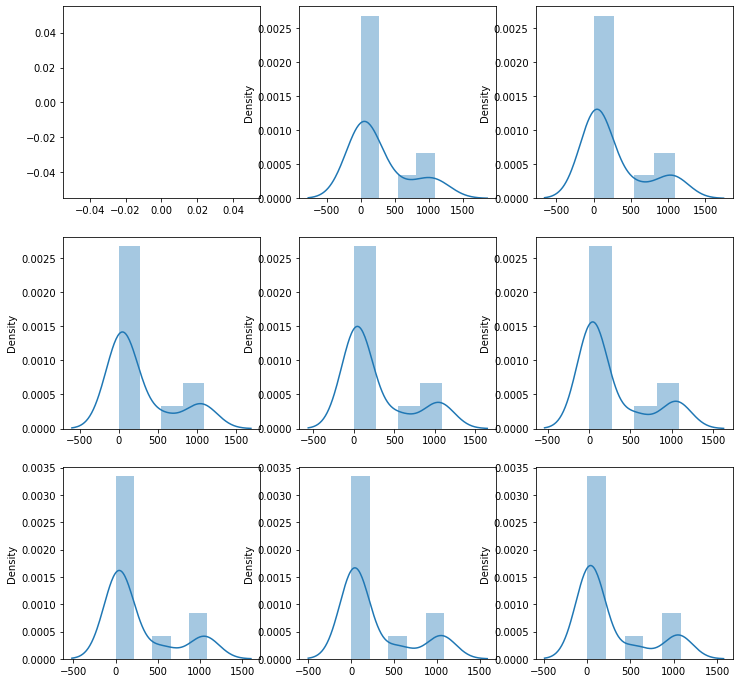

In [93]:
plt.figure(figsize=(12,12))
for i in range(1,10):
  plt.subplot(3,3,i)
  sns.distplot(data_2015.iloc[:i-1])

### GBM

In [93]:
def hp_obj_func_gbm(param):
  gbm= GradientBoostingRegressor(**param)
  out=cross_val_score(gbm, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [ ]:
def surr_func_gbm(params):
  perf= hp_obj_func_gbm(params)
  return {'loss':-perf,'status': STATUS_OK}

In [ ]:
trials = Trials()
best_gbm = fmin(surr_func_gbm, space=param_gbm, algo=tpe.suggest,
               max_evals=100, trials=trials)
print('best_gbm:')
print(best_gbm)

In [ ]:
best_gbm

In [ ]:
gbm_reg = GradientBoostingRegressor(**best_gbm)
gbm_reg.fit(x_train, y_train)
pred_gbm = gbm_reg.predict(x_test)
print(mean_squared_error(pred_gbm, y_test))

In [ ]:
gbm_reg = GradientBoostingRegressor(**best_gbm)
gbm_reg.fit(x_train, y_train)
pred_gbm = gbm_reg.predict(x_test)
print(mean_squared_error(pred_gbm, y_test))

### XgBoost

In [94]:
def hp_obj_func_xgb(param):
  xgb= XGBRegressor(**param)
  out=cross_val_score(xgb, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [95]:
def surr_func_xgb(params):
  perf= hp_obj_func_xgb(params)
  return {'loss':-perf,'status': STATUS_OK}

In [96]:
trials = Trials()
best_xgb = fmin(surr_func_xgb, space=param_xgb, algo=tpe.suggest,
               max_evals=100, trials=trials)
print('best_xgb:')
print(best_xgb)

[08:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-1.1914817119686911
[08:51:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:51:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now depre

In [97]:
# best_xgb = {'colsample_bytree': 0.5904951775918889, 'learning_rate': 0.024729072063200287, 'max_depth': 5, 'n_estimators': 267}

In [98]:
# best_xgb = {'colsample_bytree': 0.7974445913518547, 'learning_rate': 0.09830911482175203, 'max_depth': 5, 'n_estimators': 380}

In [108]:
best_xgb

{'colsample_bytree': 0.7974445913518547,
 'learning_rate': 0.09830911482175203,
 'max_depth': 5,
 'n_estimators': 380}

In [99]:
xgb_reg = XGBRegressor(**best_xgb)
xgb_reg.fit(x_train, y_train)
pred_xgb = xgb_reg.predict(x_test)
print(mean_squared_error(pred_xgb, y_test))

[09:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.2103713408160324


In [100]:
xgb_reg = XGBRegressor(**best_xgb)
xgb_reg.fit(x_train, y_train)
pred_xgb = xgb_reg.predict(x_test)
print(mean_squared_error(pred_xgb, y_test))

[09:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.2103713408160324


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to u

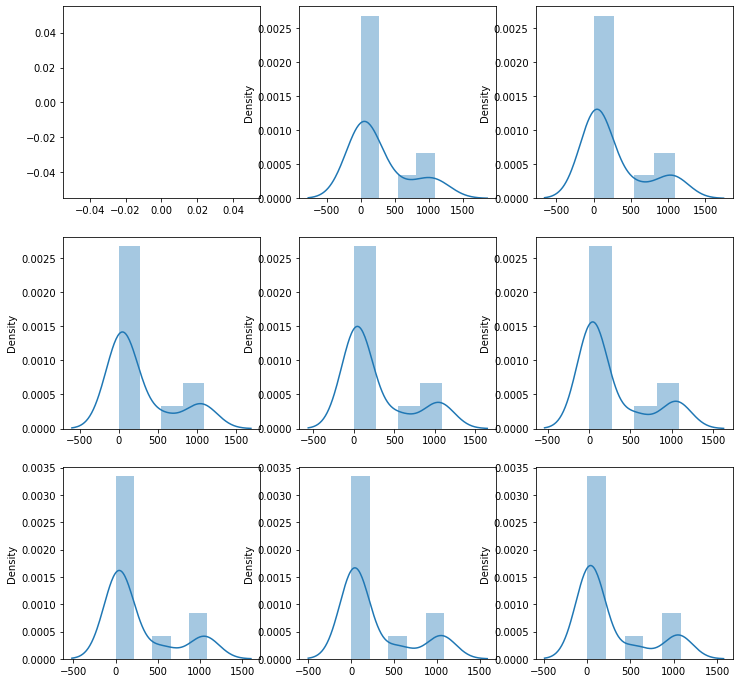

In [101]:
plt.figure(figsize=(12,12))
for i in range(1,10):
  plt.subplot(3,3,i)
  sns.distplot(data_2015.iloc[:i-1])

### (Possible addition) LightGBM

### SVM

In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(x_train, y_train)

In [ ]:
svr_linear.score(x_test,y_test)

In [ ]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(x_train, y_train) 

In [ ]:
svr_rbf.score(x_test,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(x_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(x_test))))

### Code Last Run:

In [102]:
from datetime import datetime
import pytz
print('signed off at  ',datetime.now(pytz.timezone('Asia/Kolkata')))

signed off at   2023-02-13 15:06:14.189804+05:30


## Hypothesis Testing

###Z-Test 2 sample test


In [103]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest as ztest
import pandas as pd



In [104]:
df1=pd.concat([pd.read_csv("gt_2011.csv"),pd.read_csv("gt_2012.csv"),pd.read_csv("gt_2013.csv"),pd.read_csv("gt_2014.csv")],axis=0)
df2=pd.read_csv("gt_2015.csv")
df3=pd.read_csv("gt_2014.csv")


In [105]:
ztest(df3['NOX'], value=np.mean(df2['NOX']))

(1.4964623288921, 0.13453321762917658)

Conclusion: The mean value of NOX emission for 2015 is  equal to the mean value of the NOX emissions of years from 2014.

In [106]:
ztest(df3['CO'], value= np.mean(df2['CO'])) 

(-44.21694756923266, 0.0)

Conclusion: The mean value of CO emission for 2015 is not equal to the mean value of the CO emissions of years from 2014.

###ANOVA

In [107]:
from scipy.stats import f_oneway
# result= f_oneway(pd.read_csv("gt_2011.csv")['NOX'],pd.read_csv("gt_2012.csv")['NOX'],pd.read_csv("gt_2013.csv")['NOX'],pd.read_csv("gt_2014.csv")['NOX'],df2['NOX'])
result= f_oneway(pd.read_csv("gt_2011.csv")['NOX'],pd.read_csv("gt_2012.csv")['NOX'])
result

F_onewayResult(statistic=50.66293889000715, pvalue=1.1463244391073537e-12)